# Feature Representation and Classical ML Models

In this notebook, we transform our cleaned dataset into numerical representations 
(TF-IDF) and train baseline classical machine learning models 
(Logistic Regression, Naïve Bayes, SVM).


In [2]:
#load data
import pandas as pd

df = pd.read_csv("clean_fake_news.csv")
df.head()


,content,label
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,0
1,Failed GOP Candidates Remembered In Hilarious...,0
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,0
3,California AG pledges to defend birth control ...,1
4,AZ RANCHERS Living On US-Mexico Border Destroy...,0


# preprocessing

In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def clean_text(text):
    """
    Cleaning steps:
        - remove any html tags
        - keep only ASCII + European chars (remove digits, punctuation, emojis)
        - remove single letter chars
        - normalize multiple whitespaces
        - lowercase
        - remove stopwords
        - apply lemmatization
    """

    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)        # normalize spaces
    RE_TAGS = re.compile(r"<[^>]+>")                     # remove HTML tags
    RE_ASCII = re.compile(r"[^A-Za-zÀ-ž ]", re.IGNORECASE)  # keep only letters
    RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE)  # remove single chars

    # Remove unwanted patterns
    text = re.sub(RE_TAGS, " ", text)
    text = re.sub(RE_ASCII, " ", text)
    text = re.sub(RE_SINGLECHAR, " ", text)
    text = re.sub(RE_WSPACE, " ", text)

    # Tokenize
    word_tokens = word_tokenize(text.lower())  # lowercase here

    # Remove stopwords + Lemmatize
    words_filtered = [lemmatizer.lemmatize(word) for word in word_tokens if word not in stop_words]

    text_clean = " ".join(words_filtered)
    return text_clean


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Delta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Delta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Delta\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
df["content_clean"] = df["content"].apply(clean_text)

In [6]:
df["content_clean"] [0]

'breaking gop chairman grassley enough demand trump jr testimony donald trump white house chaos trying cover russia problem mounting hour refuse acknowledge problem surrounding fake news hoax however fact bear thing differently seems crack congressional public leadership chuck grassley iowa head senate judiciary committee fed demanding donald trump jr former trump campaign manager paul manafort testify committee regarding infamous shady meeting donald trump shady russian lawyer promised dirt democratic presidential nominee hillary clinton fact information due well demand sends signal team trump notably fire special counsel robert mueller circumstance despite fact seems seems trump white house laying groundwork speak speak tweet regarding grassley warning also anyone think senator grassley rest senate serious need look warning already given trump jr manafort either follow order served subpoena force comply refuse held contempt congress carry serious jail time even cruel craven creature 

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Representation
tfidf = TfidfVectorizer(max_features=10000)  
X = tfidf.fit_transform(df["content_clean"])    
y = df["label"]




In [8]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Train Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Predict
y_pred = nb.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.933184855233853

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      4669
           1       0.93      0.93      0.93      4311

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



In [9]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)

# Evaluate
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.987750556792873

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4669
           1       0.98      0.99      0.99      4311

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [10]:
from sklearn.svm import LinearSVC

# Train SVM
svm = LinearSVC()
svm.fit(X_train, y_train)

# Predict
y_pred_svm = svm.predict(X_test)

# Evaluate
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_pred_svm, y_test))


C:\Users\Delta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


SVM Accuracy: 0.994543429844098

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      4658
           1       1.00      0.99      0.99      4322

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



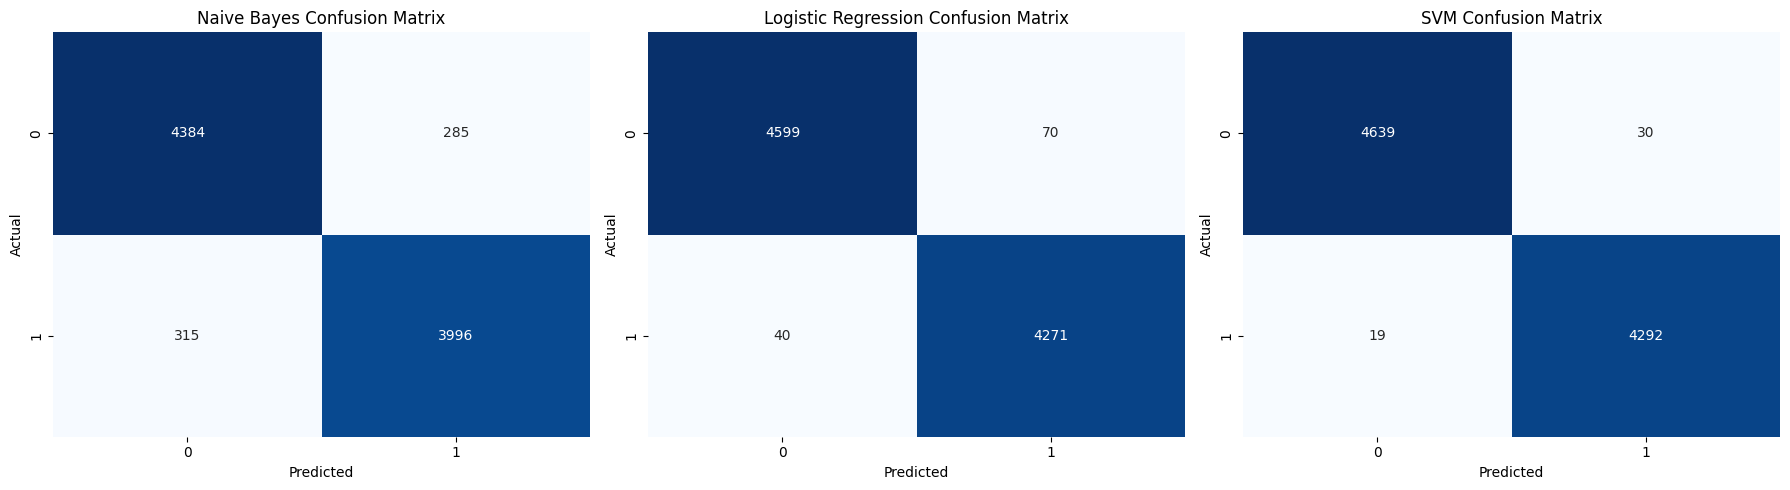

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# القيم اللي عندك من prediction
y_preds = {
    "Naive Bayes": y_pred,
    "Logistic Regression": y_pred_lr,
    "SVM": y_pred_svm
}

plt.figure(figsize=(18,5))

for i, (name, y_p) in enumerate(y_preds.items(), 1):
    cm = confusion_matrix(y_test, y_p)
    plt.subplot(1, 3, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()
